In [ ]:
# MODEL DEPLOYMENT

In [1]:
import pandas as pd
df = pd.read_csv("/content/spamraw.csv")
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df['type'].value_counts()

ham     4812
spam     747
Name: type, dtype: int64

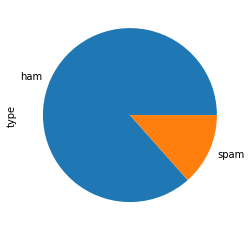

In [ ]:
df['type'].value_counts().plot(kind = 'pie')

In [ ]:
x = df.iloc[:,1].values
y = df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()


In [ ]:
model.fit(x_train_v,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_v)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100


98.56115107913669

In [ ]:
a = df['text'][5]
a

'Aiya we discuss later lar... Pick u up at 4 is it?'

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [ ]:
b = df['text'][3]
b

'complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+'

In [ ]:
b = vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [ ]:
c = "you won cash prize"
c

'you won cash prize'

In [ ]:
c = vect.transform([c])
model.predict(c)

array(['spam'], dtype=object)

In [ ]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
y_pred1 = text_model.predict(x_test)
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
accuracy_score(y_pred1,y_test)*100

98.56115107913669

In [ ]:
a1 = df['text'][16]
a1

'Darren was saying dat if u meeting da ge den we dun meet 4 dinner. Cos later u leave xy will feel awkward. Den u meet him 4 lunch lor.'

In [ ]:
text_model.predict([a1])

array(['ham'], dtype=object)

In [ ]:
text_model.predict(["good morning"])

array(['ham'], dtype=object)

In [ ]:
import joblib
joblib.dump(text_model,'messages')

['messages']